# Reddit Headlines and Stock Market Performance

## Load and Clean Data

In [2]:
#
import pandas as pd

# com_news_df = pd.read_csv("C:/Users/Yonas/OneDrive/Desktop/IMT 575/Group Project/Files/Combined_News_DJIA.csv")
com_news_df = pd.read_csv('data/Combined_News_DJIA.csv')
com_news_df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,8/8/2008,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,8/11/2008,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,8/12/2008,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,8/13/2008,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,8/14/2008,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to mis

In [3]:
# look at the top1 headlines
com_news_df.shape

(1989, 27)

In [5]:
# DJIA_data = pd.read_csv('C:/Users/Yonas/OneDrive/Desktop/IMT 575/Group Project/Files/upload_DJIA_table.csv')
DJIA_data = pd.read_csv('data/upload_DJIA_table.csv')

DJIA_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1989 non-null   object 
 1   Open       1989 non-null   float64
 2   High       1989 non-null   float64
 3   Low        1989 non-null   float64
 4   Close      1989 non-null   float64
 5   Volume     1989 non-null   int64  
 6   Adj Close  1989 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 108.9+ KB


In [6]:
print(com_news_df.shape, DJIA_data.shape )

(1989, 27) (1989, 7)


Merge the Dow Jones and the top news from reddit together. Also create a copy of the DF in order to use for sentiment later

In [14]:
merged_data = com_news_df.merge(DJIA_data, how = 'inner', on = 'Date', left_index = True, right_index=True)

merged_data_sent = merged_data.copy()

In [15]:
merged_data.head(3)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top22,Top23,Top24,Top25,Open,High,Low,Close,Volume,Adj Close
0,8/8/2008,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,8/11/2008,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,8/12/2008,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688


Merge all 25 top headlines together

In [16]:
# to combine the first 5 coulums of the top news in
top25_headlines = []

for row in range(0, len(merged_data.index)):
    top25_headlines.append(' '.join( str(x) for x in merged_data.iloc[row, 2:27]))
    
    
# merged_data[:28,'top5_headlines'] = top5_headlines
# merged_data.head

In [17]:
merged_data.insert(2, "top25_headlines", top25_headlines, True)
merged_data.head()

# 

,Date,Label,top25_headlines,Top1,Top2,Top3,Top4,Top5,Top6,Top7,...,Top22,Top23,Top24,Top25,Open,High,Low,Close,Volume,Adj Close
0,8/8/2008,0,"b""Georgia 'downs two Russian warplanes' as cou...","b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...",...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,8/11/2008,1,b'Why wont America and Nato help us? If they w...,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,8/12/2008,0,b'Remember that adorable 9-year-old who sang a...,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,...,b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,8/13/2008,0,b' U.S. refuses Israel weapons to attack Iran:...,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",...,b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,8/14/2008,1,b'All the experts admit that we should legalis...,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,...,b'Taliban wages war on humanitarian aid workers',"b'Russia: World ""can forget about"" Georgia\'s...",b'Darfur rebels accuse Sudan of mounting major...,b'Philippines : Peace Advocate say Muslims nee...,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


In [18]:
# merged_data.insert(26, "top25_headlines", top25_headlines, True)
# merged_data

Optionally delete other extra columns of data [2:27]]


In [19]:

#merged_data.drop(merged_data.iloc[:, 3:28], inplace = True, axis = 1)
#merged_data

Sort the columns by Date

In [20]:
merged_data = merged_data.sort_values(by="Date")
merged_data

,Date,Label,top25_headlines,Top1,Top2,Top3,Top4,Top5,Top6,Top7,...,Top22,Top23,Top24,Top25,Open,High,Low,Close,Volume,Adj Close
610,1/10/2011,0,Russia's Murrow moment - Leonid Parfyonov's st...,Russia's Murrow moment - Leonid Parfyonov's st...,US forces have fired so many bullets in Iraq a...,"Sodomy is punishable by death in Saudi Arabia,...",Plane carrying 105 people crashes in Iran,500 lawyers have signed up to defend Pakistan ...,The Royal Family is to be granted absolute pro...,A trial against six environmental activists ha...,...,Pope says sex education an 'attack on religiou...,Tunisia closes schools and universities follow...,Floods continue to batter Australia - \nOne pe...,German investigators have found excessive leve...,15743.030273,15907.530273,15733.269531,15848.610352,92100000,15848.610352
862,1/10/2012,1,Australia Tells Japan Whalers to Stay Out of i...,Australia Tells Japan Whalers to Stay Out of i...,Top German cop installed spyware on his daught...,"""McDonald's restaurants are fighting back agai...",North Korea announces prisoner amnesty,"Swiss want six holiday weeks, Swiss voters are...",A group of holy men in India's Karnataka state...,Mexico's Anti-Abortion Backlash - \nIn just 2 ...,...,Fukushima nuclear plant worker in coma after c...,Chinese writers sue Apple for copyright violation,Nationwide 'Occupy' strike paralyzes Nigeria,Doomsday Clock Moved 1 Minute Closer to Midnight,13954.419922,13966.129883,13896.950195,13910.419922,117200000,13910.419922
1113,1/10/2013,1,The world's population could actually start de...,The world's population could actually start de...,Ex-CIA Analyst Finds Mysterious Chinese Comple...,German bishops cancel study into sexual abuse ...,'My goodness there's a snake on the wing': Sna...,McDonalds to give out books instead of toys in...,Pakistan kiln laborers hemmed in by debts they...,Blind stroke victim tasered after a police off...,...,U.N. wants to use drones for peacekeeping miss...,"Australian Wildfires: Clinging to Life, a Fami...",Saudi Arabia Beheads Young Sri Lankan Maid,Millions of New Species of 'Killer Slugs' From...,12659.169922,12659.320312,12529.410156,12653.719727,130430000,12653.719727
1365,1/10/2014,0,The people behind the GSM standard: We were pr...,The people behind the GSM standard: We were pr...,"Man gets homeless teenager, dips her head into...",US Marines Shoot and Kill Four-Year-Old Afghan...,University student refuses to work with women ...,"NSA and GCHQ activities appear illegal, says E...","France bans standup show before it starts, bec...","Israel defies World Bank, refuses to let Pales...",...,16-year legal battle over laptop reaches UK su...,A young lion has died after getting its head c...,Afghan boy killed by US forces as Nato staff d...,Only 432 people own half of the private land i...,11990.360352,12012.419922,11803.040039,11823.700195,214170000,11823.700195
358,1/11/2010,1,b'Why would a former Guantanamo Bay prison gua...,b'Why would a former Guantanamo Bay prison gua...,"b""Barred from using lead in children's jewelry...","b""Israelis use clever 'Catch-22' ruse to put t...","b'Michael Chertoff, Former Department of Homel...",b'Italians fight back against surveillance soc...,b'Stop-and-search powers ruled illegal by Euro...,b'UK Stop and search powers ruled illegal by \...,...,b'Iranian nuclear physicist killed in bombing....,b'Despite more than a dozen international conv...,"b'H1N1-Gate: Big Pharma, WHO triggered organiz...","b'China operates what is, by several measures,...",17416.849609,17419.900391,17156.820312,17164.949219,168560000,17164.949219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,9/9/2010,1,Afghan insurgents give captive reporter a cell...,Afghan insurgents give captive reporter a cell...,"Terrorism : Suicide attack in Russia kills 15,...","Olympic Disaster in Vancouver, Taxpayers on Ho...",Anti-Israel boycotts are gaining speed,What America Left Behind in Iraq - It's even u...,UK 

# Preprocessing the code

Use regex to remove stopwords and to lemmatize all of the top 25 headlines

In [21]:
import regex as re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def prepro_text(target_text):
    # if b'/b"
    target_text = re.sub(r"^b[\'\"]", '', target_text)
    target_text = re.sub(r"[^\w\s]", '', target_text)
    target_text = target_text.lower().strip()
    target_text = target_text.split()
    target_text = ' '.join([x for x in target_text if x not in stopwords.words('english')])
    return target_text

In [22]:
# applymap to the whole dataframe



merged_data.iloc[:,2] = merged_data.iloc[:,2:].applymap(lambda element:prepro_text(str(element)))
merged_data.head()

# restart and run the following code only once!
# com_news_df.to_csv('cleaned_Combined_News_DJIA.csv')

,Date,Label,top25_headlines,Top1,Top2,Top3,Top4,Top5,Top6,Top7,...,Top22,Top23,Top24,Top25,Open,High,Low,Close,Volume,Adj Close
610,1/10/2011,0,russias murrow moment leonid parfyonovs stunni...,Russia's Murrow moment - Leonid Parfyonov's st...,US forces have fired so many bullets in Iraq a...,"Sodomy is punishable by death in Saudi Arabia,...",Plane carrying 105 people crashes in Iran,500 lawyers have signed up to defend Pakistan ...,The Royal Family is to be granted absolute pro...,A trial against six environmental activists ha...,...,Pope says sex education an 'attack on religiou...,Tunisia closes schools and universities follow...,Floods continue to batter Australia - \nOne pe...,German investigators have found excessive leve...,15743.030273,15907.530273,15733.269531,15848.610352,92100000,15848.610352
862,1/10/2012,1,australia tells japan whalers stay waters top ...,Australia Tells Japan Whalers to Stay Out of i...,Top German cop installed spyware on his daught...,"""McDonald's restaurants are fighting back agai...",North Korea announces prisoner amnesty,"Swiss want six holiday weeks, Swiss voters are...",A group of holy men in India's Karnataka state...,Mexico's Anti-Abortion Backlash - \nIn just 2 ...,...,Fukushima nuclear plant worker in coma after c...,Chinese writers sue Apple for copyright violation,Nationwide 'Occupy' strike paralyzes Nigeria,Doomsday Clock Moved 1 Minute Closer to Midnight,13954.419922,13966.129883,13896.950195,13910.419922,117200000,13910.419922
1113,1/10/2013,1,worlds population could actually start declini...,The world's population could actually start de...,Ex-CIA Analyst Finds Mysterious Chinese Comple...,German bishops cancel study into sexual abuse ...,'My goodness there's a snake on the wing': Sna...,McDonalds to give out books instead of toys in...,Pakistan kiln laborers hemmed in by debts they...,Blind stroke victim tasered after a police off...,...,U.N. wants to use drones for peacekeeping miss...,"Australian Wildfires: Clinging to Life, a Fami...",Saudi Arabia Beheads Young Sri Lankan Maid,Millions of New Species of 'Killer Slugs' From...,12659.169922,12659.320312,12529.410156,12653.719727,130430000,12653.719727
1365,1/10/2014,0,people behind gsm standard pressured weaken mo...,The people behind the GSM standard: We were pr...,"Man gets homeless teenager, dips her head into...",US Marines Shoot and Kill Four-Year-Old Afghan...,University student refuses to work with women ...,"NSA and GCHQ activities appear illegal, says E...","France bans standup show before it starts, bec...","Israel defies World Bank, refuses to let Pales...",...,16-year legal battle over laptop reaches UK su...,A young lion has died after getting its head c...,Afghan boy killed by US forces as Nato staff d...,Only 432 people own half of the private land i...,11990.360352,12012.419922,11803.040039,11823.700195,214170000,11823.700195
358,1/11/2010,1,would former guantanamo bay prison guard track...,b'Why would a former Guantanamo Bay prison gua...,"b""Barred from using lead in children's jewelry...","b""Israelis use clever 'Catch-22' ruse to put t...","b'Michael Chertoff, Former Department of Homel...",b'Italians fight back against surveillance soc...,b'Stop-and-search powers ruled illegal by Euro...,b'UK Stop and search powers ruled illegal by \...,...,b'Iranian nuclear physicist killed in bombing....,b'Despite more than a dozen international conv...,"b'H1N1-Gate: Big Pharma, WHO triggered organiz...","b'China operates what is, by several measures,...",17416.849609,17419.900391,17156.820312,17164.949219,168560000,17164.949219


# Filter the dataset for stock related keywords

Filter for stock related keywords. 

Used the column with the top 25 headlines to get the new dataframe with stock keywords only. 

The new dataframe has 553 rows.

In [23]:
stock_related_keywords = "stock|market|feds|bond|bonds|stocks|bull|bear"

import numpy as np

temp_df = merged_data.copy()

merged_data_keywords = temp_df[['top25_headlines', 'Label']]

merged_data_keywords['Label'] = merged_data_keywords['Label'].astype(str)

mask = np.column_stack([merged_data_keywords[col].str.contains(stock_related_keywords, na=False) for col in merged_data_keywords])
stock_keyword = merged_data_keywords.loc[mask.any(axis=1)]

stock_keyword['Label'] = stock_keyword['Label'].astype(int)
 
stock_keyword

#backup code

# for keyword in merged_data_keywords['top25_headlines']:
#     if keyword.contains('Georgia'):
#         print('this is georgia')
    
#mask = np.column_stack([merged_data_keywords[col].str.contains(r"stock|market|feds|bond|stocks|bull|bear", na=False) for col in merged_data_keywords])
#mask = np.column_stack([df[col].str.contains(r"\^", na=False) for col in df])
#df.loc[mask.any(axis=1)]

<ipython-input-23-f45cd3e3d418>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_keywords['Label'] = merged_data_keywords['Label'].astype(str)
<ipython-input-23-f45cd3e3d418>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_keyword['Label'] = stock_keyword['Label'].astype(int)


,top25_headlines,Label
610,russias murrow moment leonid parfyonovs stunni...,0
1113,worlds population could actually start declini...,1
611,uh reddit brisbane au one largest cities curre...,1
1868,iran removes core arak heavy water nuclear rea...,1
612,west african farmers succeeded cutting use tox...,1
...,...,...
272,israels army changing proudly secular combat u...,1
524,safe place raped harvesting crops going market...,1
777,lifetime ban blood donations homosexual bisexu...,0
778,turkish prime minister turkish navy escort aid...,0


Import train test split. Use the top 25 headlines combined together as the X variable. 

The Y variable is the Label which shows whether or not the stock market went up or down

In [24]:
from sklearn.model_selection import train_test_split

X = merged_data['top25_headlines']
y = merged_data.iloc[:,1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,\
                                                   random_state=1)

<h1> Run Model for TFIDF and Tensorflow </h1>

Import the count vectorizer and tensorflow

In [1]:
# # only run once for the following code!

# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.model_selection import train_test_split
# #from sentence_transformers import SentenceTransformer
# #sentBert = SentenceTransformer('paraphrase-distilroberta-base-v1')

#Jacky's load statement

from tqdm.auto import tqdm
from sklearn.preprocessing import MaxAbsScaler
# Universal Sentence Encoder
import tensorflow_hub as hub
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
use = hub.load(module_url)
print("module %s loaded" % module_url)
import numpy as np

Import the Tfidf vectorizer. 

Create a function to run the model with either TFIDF or embedding.

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
# return the vectors
def text_vector(target_method='tfidf', \
                target_list_train=X_train.to_list(),\
                target_list_test = X_test.to_list(),\
                max_features=None):
    """
    type: target_method: string - ("tfidf", "bert", "embedding")
    rtype: list of vectors
    """
    


    if target_method == "embedding":
        use_x_train = []
        use_x_test = []
        use_x_train = use(target_list_train)
        use_x_test = use(target_list_test)
        return use_x_train, use_x_test
    
    if target_method == "tfidf":
        vectorizer = TfidfVectorizer(max_features=max_features)
        tfidf_train = vectorizer.fit_transform(target_list_train)
        tfidf_test = vectorizer.transform(target_list_test)
        tfidf_scaler = MaxAbsScaler()
        tfidf_x_train = tfidf_scaler.fit_transform(tfidf_train)
        tfidf_x_test = tfidf_scaler.transform(tfidf_test)
        return tfidf_x_train, tfidf_x_test

#extra print statements to make sure it is working    
    
# tfidf, 
# print(type(text_vector()[0].toarray()))
# print(len(text_vector()[0].toarray()[0]))

# print(type(text_vector()[1].toarray()))
# print(len(text_vector()[1].toarray()[0]))

# print(text_vector()[1])
# ;

# # tensorflow
# ans = text_vector(target_method='embedding')

# print(ans[0])
# print(type(ans[0]))
# print(len(ans[0][0]))

# print(ans[1])
# print(type(ans[1]))
# print(len(ans[1][0]))

<b> Run with Tfidf </b>

In [26]:
%%time

tfidf_x_train, tfidf_x_test = text_vector("tfidf")

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

logmodel = LogisticRegression()
logmodel.fit(tfidf_x_train, y_train)

predictions = logmodel.predict(tfidf_x_test)
print("The accuracy score is", accuracy_score(y_test, predictions))

'''
It looks like we can not use the logistic regression to make 
predictions, so the data sets might not be linearly seperateble,
so we are thinking about using SVM to solve these problems. 

'''

NameError: name 'MaxAbsScaler' is not defined

<b> try to use the SVM model </b> 

In [24]:
from sklearn.svm import SVC

In [25]:
# let's try to use different kernels to predict the result
svm_poly = SVC(kernel = 'poly')
svm_poly.fit(tfidf_x_train, y_train)
svm_poly_pred = svm_poly.predict(tfidf_x_test)
print(accuracy_score(y_test, svm_poly_pred))

0.4798994974874372


In [26]:
svm_linear = SVC(kernel = 'linear')
svm_linear.fit(tfidf_x_train, y_train)

svm_linear_pred = svm_linear.predict(tfidf_x_test)
print(accuracy_score(y_test, svm_linear_pred))

0.5100502512562815


In [27]:
def svm_pred_tfidf(target_kernel):
    model = SVC(kernel = target_kernel)
    model.fit(tfidf_x_train, y_train)
    
    predictions = model.predict(tfidf_x_test)
    return accuracy_score(y_test, predictions)
    

In [28]:
print('poly', svm_pred_tfidf('poly'))

poly 0.4798994974874372


In [29]:
print('linear', svm_pred_tfidf('linear'))

linear 0.5100502512562815


In [30]:
print('rbf', svm_pred_tfidf('rbf'))

rbf 0.47738693467336685


In [31]:
print('sigmoid', svm_pred_tfidf('sigmoid'))

sigmoid 0.46733668341708545


### we can't get a good predictions, so we try to use the embeddings to look at it

In [32]:
%%time

# embedding
embedding_x_train, embedding_x_test = text_vector("embedding")

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

logmodel = LogisticRegression()
logmodel.fit(embedding_x_train, y_train)

predictions = logmodel.predict(embedding_x_test)
print(accuracy_score(y_test, predictions))

'''
It looks like embedding is performing a litting bit better
'''

0.4648241206030151
Wall time: 36.9 s


'\nIt looks like embedding is performing a litting bit better\n'

<H1> Sentiment Stuff </h1>

Write function to get the sentiment using vader and textblob.

In [27]:
#uses textblob to get the sentiment scores of the column 
import nltk
nltk.download('vader_lexicon')
from textblob import TextBlob
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.sentiment import vader
sia = vader.SentimentIntensityAnalyzer()

def text_sent(target_method, target_list_text):
    """
    
    rtype: list of entiment scores
    """
    if target_method == 'blob':
        blob_list = []
        for title in target_list_text:
            blob = TextBlob(title)
            blob_list.append(blob.sentiment.polarity)
    
        return blob_list
    
    if target_method == 'NLTK':
        NLTK_list = []

        for title in target_list_text:
            sia_polarity = sia.polarity_scores(title)
            NLTK_list.append(sia_polarity['compound'])
        return NLTK_list

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Yonas\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Get the average sentiment

In [28]:
#For some reason can't get the sentiment for the last 3 columns

# Average sentiment for column by blob

column_list_blob = []

for i in range(1,23):
    #print(i,'i is')
    i_str = str(i)
    Topic = ('Top'+i_str) # 'Top' + 1 = 'Top1'
    Topic_sent_blob = (Topic + '_sent_' 'blob') 
    topic_list = text_sent("blob",merged_data_sent[Topic])
    merged_data_sent[Topic_sent_blob] = topic_list
    column_list_blob.append(Topic_sent_blob)


merged_data_sent_sum_blob = merged_data_sent[column_list_blob].sum(axis=1)
merged_data_sent["average_blob_sent"] = merged_data_sent_sum_blob / 22

 
# Average sentiment by column for NLTK   


column_list_nltk = []

for i in range(1,23):
    i_str = str(i)
    Topic = ('Top'+i_str)
    Topic_sent_nltk = (Topic + '_sent_' 'NLTK')
    topic_list = text_sent("NLTK",merged_data_sent[Topic])
    merged_data_sent[Topic_sent_nltk] = topic_list
    column_list_nltk.append(Topic_sent_nltk)

merged_data_sent_sum_nltk = merged_data_sent[column_list_nltk].sum(axis=1)
merged_data_sent["average_nltk_sent"] = merged_data_sent_sum_nltk / 22 
    


In [93]:
merged_data_sent['Top23']

1988    b'Indian shoe manufactory  - And again in a se...
1987    b'Perhaps *the* question about the Georgia - R...
1986    b'Christopher King argues that the US and NATO...
1985    b' Quarter of Russians blame U.S. for conflict...
1984    b'Russia: World  "can forget about" Georgia\'s...
                              ...                        
4       Economists predict UK recession, further weake...
3       Brexit: Gibraltar in talks with Scotland to st...
2       Extremist violence on the rise in Germany: Dom...
1       We will be swimming in ridicule - French beach...
0       Venezuela, where anger over food shortages is ...
Name: Top23, Length: 1989, dtype: object

Create a DF with just the average blob sent and the average nltk sent. Get the average sent for each day

In [11]:
label_sent_df= merged_data_sent[['average_nltk_sent', 'average_blob_sent', 'Label']]

print('average NLTK sent is' , round(label_sent_df["average_nltk_sent"].mean(),2))
print('average Blob sent is' , round(label_sent_df["average_blob_sent"].mean(),2))
label_sent_df

average NLTK sent is -0.2
average Blob sent is 0.01


,average_nltk_sent,average_blob_sent,Label
1988,-0.290255,-0.048722,0
1987,-0.114414,0.030705,1
1986,-0.288518,-0.041955,0
1985,-0.153573,0.005201,0
1984,-0.130273,0.054723,1
...,...,...,...
4,-0.146218,-0.007135,0
3,-0.032705,0.019527,1
2,-0.244345,0.066065,1
1,-0.214800,0.020274,1


Check if positive sentiment for the day is related to a rise in stock prices. 

If the Dow Jones went up and the sentiment was postive mark as "correct". If the Dow Jones went up and sentiment was down mark as incorrect. 

If the Dow Jones went down and the sentiment was postive mark as "incorrect". If the Dow Jones went down and sentiment was down marka as incorrect. 

Do this for both vader and blob.

In [29]:
nltk_correct = []
blob_correct = []


for average_nltk_sent, average_blob_sent, Label in label_sent_df.itertuples(index=False):
    if average_nltk_sent <0:
        if Label == 0:
            correct = 1
            nltk_correct.append(1)
        else:
            correct = 0
            nltk_correct.append(0)
    else:
    #if average_nltk_sent > 0:
        if Label == 1:
            correct = 1
            nltk_correct.append(1)
        else:
            correct = 0
            nltk_correct.append(0)
            
    if average_blob_sent <0:
        if Label == 0:
            correct = 1
            blob_correct.append(1)
        else:
            correct = 0
            blob_correct.append(0)
    else:
    #if average_nltk_sent > 0:
        if Label == 1:
            correct = 1
            blob_correct.append(1)
        else:
            correct = 0
            blob_correct.append(0)

label_sent_df['nltk_correct_score'] = nltk_correct
label_sent_df['blob_correct_score'] = blob_correct

    
label_sent_df 



NameError: name 'label_sent_df' is not defined

Insert extra columns in DF showing if the blob or vader sent was negative or postive

In [ ]:
import numpy as np

average_blob_sent_pos = []
for x in label_sent_df['average_blob_sent']:
    if x > 0:
        average_blob_sent_pos.append(1)
    else:
        average_blob_sent_pos.append(0)

label_sent_df['average_blob_sent_pos'] = average_blob_sent_pos

average_nltk_sent_pos = []
for x in label_sent_df['average_nltk_sent']:
    if x > 0:
        average_nltk_sent_pos.append(1)
    else:
        average_nltk_sent_pos.append(0)

label_sent_df['average_nltk_sent_pos'] = average_nltk_sent_pos


label_sent_df['nltk_equals_blob_pos'] = (label_sent_df['average_nltk_sent_pos']==label_sent_df['average_blob_sent_pos']).astype(int)

label_sent_df



Create plots based of the amount of postives days for both vader and blob sent. 

Also compare how many of the vader sentiment matching the blob sentiment. 

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

label_sent_df['nltk_equals_blob_pos'] = label_sent_df.nltk_equals_blob_pos.astype(bool)
label_sent_df['average_blob_sent_pos'] = label_sent_df.average_blob_sent_pos.astype(bool)
label_sent_df['average_nltk_sent_pos'] = label_sent_df.average_nltk_sent_pos.astype(bool)
label_sent_df['nltk_correct_score'] = label_sent_df.nltk_correct_score.astype(bool)
label_sent_df['blob_correct_score'] = label_sent_df.blob_correct_score.astype(bool)


percentage = lambda i: len(i) / float(len(x)) * 100

x= label_sent_df['nltk_equals_blob_pos']
ax = sns.barplot(x=x, y=x,  estimator=percentage)
ax.set(ylabel="Percent", xlabel = 'Vader & NLTK have Same Sentiment', title = 'Vader & NLTK Same Sentiment Polarity')
plt.show()


percentage = lambda i: len(i) / float(len(x)) * 100

x= label_sent_df['average_blob_sent_pos']
ax = sns.barplot(x=x, y=x,  estimator=percentage)
ax.set(ylabel="Percent", xlabel = 'TextBlob Average Sentiment for Day Positive')
plt.show()


percentage = lambda i: len(i) / float(len(x)) * 100

x= label_sent_df['average_nltk_sent_pos']
ax = sns.barplot(x=x, y=x,  estimator=percentage)
ax.set(ylabel="Percent", xlabel = 'Vader Average Sentiment for Day Positive')
plt.show()


x= label_sent_df['nltk_correct_score']
ax = sns.barplot(x=x, y=x,  estimator=percentage)
ax.set(ylabel="Percent", xlabel = 'Vader Score Matches Label Score')
plt.show()

x= label_sent_df['blob_correct_score']
ax = sns.barplot(x=x, y=x,  estimator=percentage)
ax.set(ylabel="Percent", xlabel = 'NLTK Score Matches Label Score')
plt.show()







NameError: name 'label_sent_df' is not defined

In [75]:
#label_sent_df['blob_correct_score'].sum()
#label_sent_df['nltk_correct_score'].sum()

# Method 1

# Model Selection:

In [31]:
from sklearn.linear_model import LinearRegression
from keras.layers import LSTM
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = "r2"

# Spot-Check Algorithms
models = []
models.append((' LR ', LinearRegression()))
models.append((' KNN ', KNeighborsRegressor()))
models.append((' DTR ', DecisionTreeRegressor()))
models.append((' SVR ', SVR()))

In [330]:
# https://dev.to/nitdgplug/stonksmaster-predict-stock-prices-using-python-ml-3hmc

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    # print(cv_results)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

 LR : -0.012713 (0.011346)
 KNN : -0.202239 (0.075369)
 DTR : -1.046649 (0.144928)
 SVR : -0.507500 (0.108830)


The output of the above code gives us the accuracy estimations for each of our algorithms. We need to compare the models to each other and select the most accurate.

In [32]:
X = merged_data_sent[['average_blob_sent']]
X = merged_data_sent[['average_nltk_sent']]

X

,average_blob_sent
1988,-0.048722
1987,0.030705
1986,-0.041955
1985,0.005201
1984,0.054723
...,...
4,-0.007135
3,0.019527
2,0.066065
1,0.020274


# Logistic Regression Model

Do a simple logistic regression model using sentiment to predict if stocks went up or down

Use text blob and NLTK as the X and the Label of whether stock went down or up as the y

<b> textBlob </b>

In [72]:
#need to split into blob and NLTK and not combine together.



from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(solver='liblinear')


X_blob = merged_data_sent[['average_blob_sent']]
y_blob = merged_data_sent['Label']


X_train, X_test, y_train, y_test = train_test_split(X_blob, y_blob, test_size=0.2)

              precision    recall  f1-score   support

           0       0.55      0.03      0.06       192
           1       0.52      0.98      0.68       206

    accuracy                           0.52       398
   macro avg       0.53      0.50      0.37       398
weighted avg       0.53      0.52      0.38       398



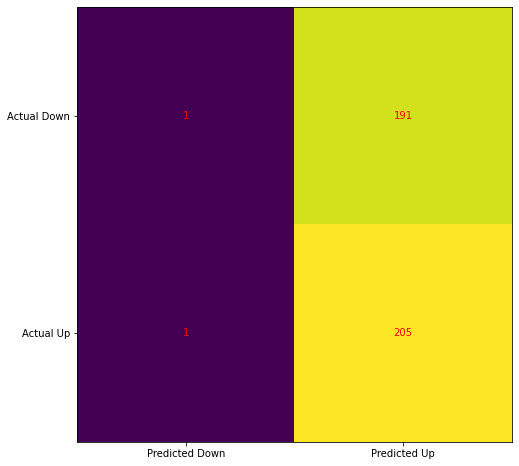

In [81]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions_blob = logmodel.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

cm = confusion_matrix(y_test, predictions_blob)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Down', 'Predicted Up'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Down', 'Actual Up'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

<b> NLTK </b>

In [82]:
#need to split into blob and NLTK and not combine together.



from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(solver='liblinear')


X_nltk = merged_data_sent[['average_nltk_sent']]
y_nltk = merged_data_sent['Label']


X_train, X_test, y_train, y_test = train_test_split(X_nltk, y_nltk, test_size=0.2)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       182
           1       0.54      1.00      0.70       216

    accuracy                           0.54       398
   macro avg       0.27      0.50      0.35       398
weighted avg       0.29      0.54      0.38       398



C:\Users\Yonas\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


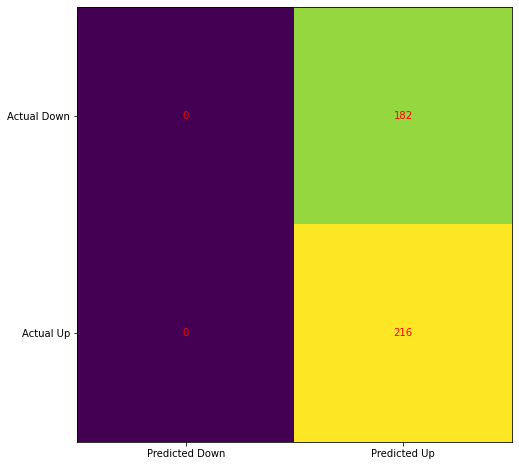

In [83]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

predictions_nltk = logmodel.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,predictions_nltk))

cm = confusion_matrix(y_test, predictions_nltk)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Down', 'Predicted Up'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Down', 'Actual Up'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# Decision Tree Classifier

<b> textBlob </b>

In [84]:
from sklearn.tree import DecisionTreeClassifier

classifier_tree = DecisionTreeClassifier()

X_blob = merged_data_sent[['average_blob_sent']]
y_blob = merged_data_sent['Label']


X_train, X_test, y_train, y_test = train_test_split(X_blob, y_blob, test_size=0.2)



Decision Tree Classifier using text blob 
               precision    recall  f1-score   support

           0       0.43      0.38      0.40       180
           1       0.53      0.57      0.55       218

    accuracy                           0.49       398
   macro avg       0.48      0.48      0.48       398
weighted avg       0.48      0.49      0.48       398



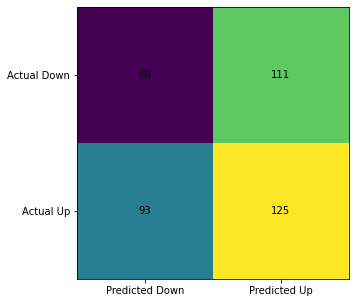

In [86]:

y_predict_blob = classifier_tree.fit(X_train, y_train).predict(X_test)

print("Decision Tree Classifier using text blob \n",classification_report(y_test, y_predict_blob))


cm = confusion_matrix(y_test, y_predict_blob)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Down', 'Predicted Up'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Down', 'Actual Up'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black')
plt.show()

<b> NLTK (Vader) </b>

In [87]:
from sklearn.tree import DecisionTreeClassifier

classifier_tree = DecisionTreeClassifier()

X_nltk = merged_data_sent[['average_nltk_sent']]
y_nltk = merged_data_sent['Label']


X_train, X_test, y_train, y_test = train_test_split(X_nltk, y_nltk, test_size=0.2)


Decision Tree Classifier using NLTK 
               precision    recall  f1-score   support

           0       0.47      0.57      0.52       174
           1       0.60      0.50      0.55       224

    accuracy                           0.54       398
   macro avg       0.54      0.54      0.53       398
weighted avg       0.55      0.54      0.54       398



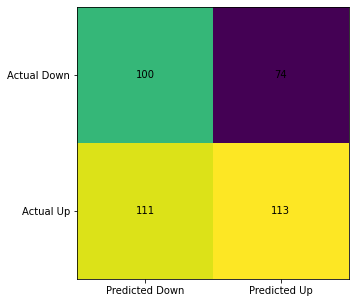

In [88]:
y_predict_nltk = classifier_tree.fit(X_train, y_train).predict(X_test)

print("Decision Tree Classifier using NLTK \n", classification_report(y_test, y_predict_nltk))



cm = confusion_matrix(y_test, y_predict_nltk)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Down', 'Predicted Up'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Down', 'Actual Up'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black')
plt.show()

# Result

# Backup Ignore for now

<!-- **Answer** Our questions are:
Are there any relations between news headlines on major social media platforms between the trend of the stock market such as Dow Jones? 
    
<p style="color:green;"> The correlation for both sentiment score are low and it doen't show any relation between 'Top News' & 'Daily Stock Price'. 
 
What type of pattern in the headlines will make the stock market increase than the previous day, and what type of pattern in the headlines will make the stock market decrease than the previous day?
    
<p style="color:green;"> The above corrlation graph doen't show any relationship.
    
    
Does sentiments in the headlines affect our accuracy for classification and predictions?
  
<p style="color:green;"> headline effect -->
    

# Method 2

In [60]:
# chceking the null values in our data
print("checking if any null values are present\n", merged_data.isna().sum())

checking if any null values are present
 Date               0
Label              0
top25_headlines    0
Top1               0
Top2               0
Top3               0
Top4               0
Top5               0
Top6               0
Top7               0
Top8               0
Top9               0
Top10              0
Top11              0
Top12              0
Top13              0
Top14              0
Top15              0
Top16              0
Top17              0
Top18              0
Top19              0
Top20              0
Top21              0
Top22              0
Top23              1
Top24              3
Top25              3
Open               0
High               0
Low                0
Close              0
Volume             0
Adj Close          0
dtype: int64


In [308]:
merged_dataNew = merged_data[['Top25_sent_blob','Top25_sent_NLTK', 'Return']]
merged_dataNew

,Top25_sent_blob,Top25_sent_NLTK,Return
Date,,,
2008-08-08,-0.045117,-0.9970,NaN
2008-08-11,0.070795,-0.9893,0.004093
2008-08-12,-0.006856,-0.9928,-0.011872
2008-08-13,0.006572,-0.9777,-0.009406
2008-08-14,0.015272,-0.9814,0.007194
...,...,...,...
2016-06-27,-0.020016,-0.9733,-0.014971
2016-06-28,0.042701,-0.9462,0.015722
2016-06-29,0.037304,-0.9938,0.016368


In [327]:
merged_dataNew.shape

print("checking null values\n", merged_dataNew.isna().sum())

checking null values
 Top25_sent_blob    0
Top25_sent_NLTK    0
Return             0
dtype: int64


In [318]:
merged_dataNew.shape

(1989, 3)

In [313]:
# replace NaN with 0 permanently
merged_dataNew.fillna(0, inplace=True) 
merged_dataNew

,Top25_sent_blob,Top25_sent_NLTK,Return
Date,,,
2008-08-08,-0.045117,-0.9970,0.000000
2008-08-11,0.070795,-0.9893,0.004093
2008-08-12,-0.006856,-0.9928,-0.011872
2008-08-13,0.006572,-0.9777,-0.009406
2008-08-14,0.015272,-0.9814,0.007194
...,...,...,...
2016-06-27,-0.020016,-0.9733,-0.014971
2016-06-28,0.042701,-0.9462,0.015722
2016-06-29,0.037304,-0.9938,0.016368


In [315]:
#what is the significant number of sentiment score that has predective value on tommorrows daily return 

(1989, 3)

# Test for predictive value
Now we have a cleaned data and the next step is test if there is any realtionship b/n sentiment score and the daily returns. It will help us to answer our question.

<AxesSubplot:xlabel='Top25_sent_NLTK'>

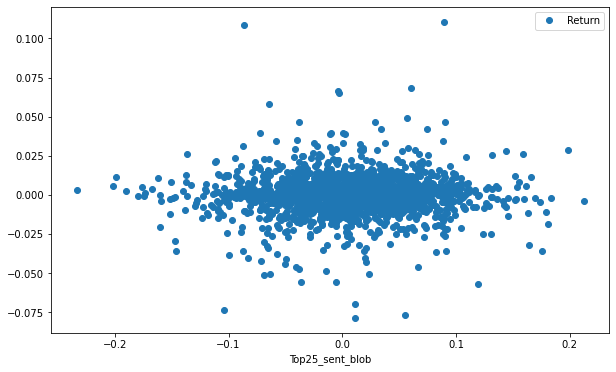

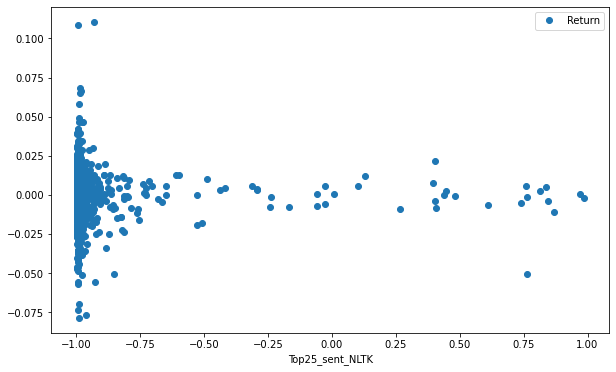

In [321]:
merged_dataNew.plot(x="Top25_sent_blob", y ="Return", style ="o")
merged_dataNew.plot(x="Top25_sent_NLTK", y ="Return", style ="o")

In [324]:
merged_dataNew['Return'].corr(merged_dataNew['Top25_sent_blob'])


0.018291001920415502

In [323]:
merged_dataNew['Return'].corr(merged_dataNew['Top25_sent_NLTK'])

-0.027903328259957318

In [29]:
#print out the sentiment score of the column "Top1" using textblob 

text_sent("blob",merged_data['top25_headlines'])

Top25_sent_blob = text_sent("blob",merged_data['top25_headlines'])

#Add the sentiment of Textblob Top1 to the DF

merged_data['Top25_sent_blob'] = Top25_sent_blob

#print out the sentiment score of the column "Top1" using NLTK


from textblob import TextBlob
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

text_sent('NLTK', merged_data['top25_headlines'])

Top25_sent_NLTK = text_sent('NLTK', merged_data['top25_headlines'])

#Add the sentiment of NTLK Top1 to the DF

merged_data['Top25_sent_NLTK'] = Top25_sent_NLTK

merged_data

#To calculate daily returns, we divide today’s prices by yesterday’s.

merged_data['Return'] = merged_data['Adj Close']/merged_data['Adj Close'].shift(1)-1
merged_data


#Do a simple logistic regression model using sentiment to predict if stocks went up or down
#Use text blob and NLTK as the X and the Label of whether stock
#went down or up as the y

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(solver='liblinear', random_state=0)


X = merged_data[['Top25_sent_NLTK','Top25_sent_blob']]
y = merged_data['Label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,\
                                                   random_state=1)

In [ ]:

#backup


#ax = (label_sent_df['average_nltk_sent_pos'].value_counts(normalize=True, sort=False)*100).plot.bar()
# ax.set(ylabel="Percent")
# plt.show()

# ax = (label_sent_df['average_blob_sent_pos'].value_counts(normalize=True, sort=False)*100).plot.bar()
# ax.set(ylabel="Percent")
# plt.show()

# ax = (label_sent_df['nltk_equals_blob_pos'].value_counts(normalize=True, sort=False)*100).plot.bar()
# ax.set(ylabel="Percent")
# plt.show()

# sns.countplot(data = label_sent_df, x = "average_blob_sent_pos")
# plt.show()
# sns.countplot(data = label_sent_df, x = "average_nltk_sent_pos")
# plt.show()
# sns.countplot(data = label_sent_df, x = "nltk_equals_blob_pos")
# plt.show()

In [ ]:
stock_related_keywords = "stock|market|feds|bond|bonds|stocks|bull|bear"

import numpy as np

temp_df = merged_data.copy()

merged_data_keywords = temp_df[['top25_headlines', 'Label']]

merged_data_keywords['Label'] = merged_data_keywords['Label'].astype(str)

mask = np.column_stack([merged_data_keywords[col].str.contains(stock_related_keywords, na=False) for col in merged_data_keywords])
stock_keyword = merged_data_keywords.loc[mask.any(axis=1)]

stock_keyword['Label'] = stock_keyword['Label'].astype(int)
 
stock_keyword

#backup code

# for keyword in merged_data_keywords['top25_headlines']:
#     if keyword.contains('Georgia'):
#         print('this is georgia')
    
#mask = np.column_stack([merged_data_keywords[col].str.contains(r"stock|market|feds|bond|stocks|bull|bear", na=False) for col in merged_data_keywords])
#mask = np.column_stack([df[col].str.contains(r"\^", na=False) for col in df])
#df.loc[mask.any(axis=1)]

In [ ]:
#bert backup


#     if target_method == "bert":
#         sentBert_x_train = []
#         sentBert_x_test = []
        
#         for i in tqdm(range(len(target_list_train))):
#             emb = sentBert.encode(target_list_train[i])
#             sentBert_x_train.append(emb)
#         sentBert_x_train = np.asarray(sentBert_x_train)

#         for i in tqdm(range(len(target_list_test))):
#             emb = sentBert.encode(target_list_test[i])
#             sentBert_x_test.append(emb)
#         sentBert_x_test = np.asarray(sentBert_x_test)
        
#         sentBert_scaler = MaxAbsScaler()
#         sentBert_x_train = sentBert_scaler.fit_transform(sentBert_x_train)
#         sentBert_x_test = sentBert_scaler.transform(sentBert_x_test)
#         return sentBert_x_train, sentBert_x_test


# sentBert
ans = text_vector(target_method='bert')

print(ans[0])
print(type(ans[0]))
print(len(ans[0][0]))

print(ans[1])
print(type(ans[1]))
print(len(ans[1][0]))